In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importando nosso dataset após o pré processamento
df = pd.read_csv("apple_quality_processed.csv", sep=",")

In [3]:
# dimensão (linhas, colunas)
print(df.shape)

(3872, 9)


In [4]:
# resumo estatístico
display(df.drop(columns="Quality").describe())

,Unnamed: 0,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000,3872.000000
mean,1998.788481,-0.004744,-0.000802,-0.001657,0.000113,0.001535,0.011096,-0.000915
std,1154.279761,0.974828,0.952124,0.974928,0.944360,0.972772,0.979348,0.984890
min,1.000000,-2.903043,-2.674900,-2.790518,-2.771001,-2.817086,-2.854454,-2.841119
25%,999.750000,-0.679785,-0.623816,-0.647445,-0.638269,-0.675521,-0.654042,-0.687534
50%,1992.500000,-0.011458,0.003524,-0.017641,0.011542,0.005287,0.014195,-0.025854
75%,3002.250000,0.662261,0.630487,0.645813,0.638800,0.675735,0.680070,0.674114
max,3999.000000,2.952893,2.697591,2.789887,2.731568,2.960724,2.891703,2.933786


In [5]:
# removendo coluna irrelevante
df.drop(columns = "Unnamed: 0", inplace=True)

In [6]:
# informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3872 non-null   float64
 1   Weight       3872 non-null   float64
 2   Sweetness    3872 non-null   float64
 3   Crunchiness  3872 non-null   float64
 4   Juiciness    3872 non-null   float64
 5   Ripeness     3872 non-null   float64
 6   Acidity      3872 non-null   float64
 7   Quality      3872 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 242.1 KB


In [7]:
# distribuição das classes
# 0 = bad
# 1 = good
df.groupby("Quality").size()

Quality
0    1958
1    1914
dtype: int64

<Figure size 1500x600 with 0 Axes>

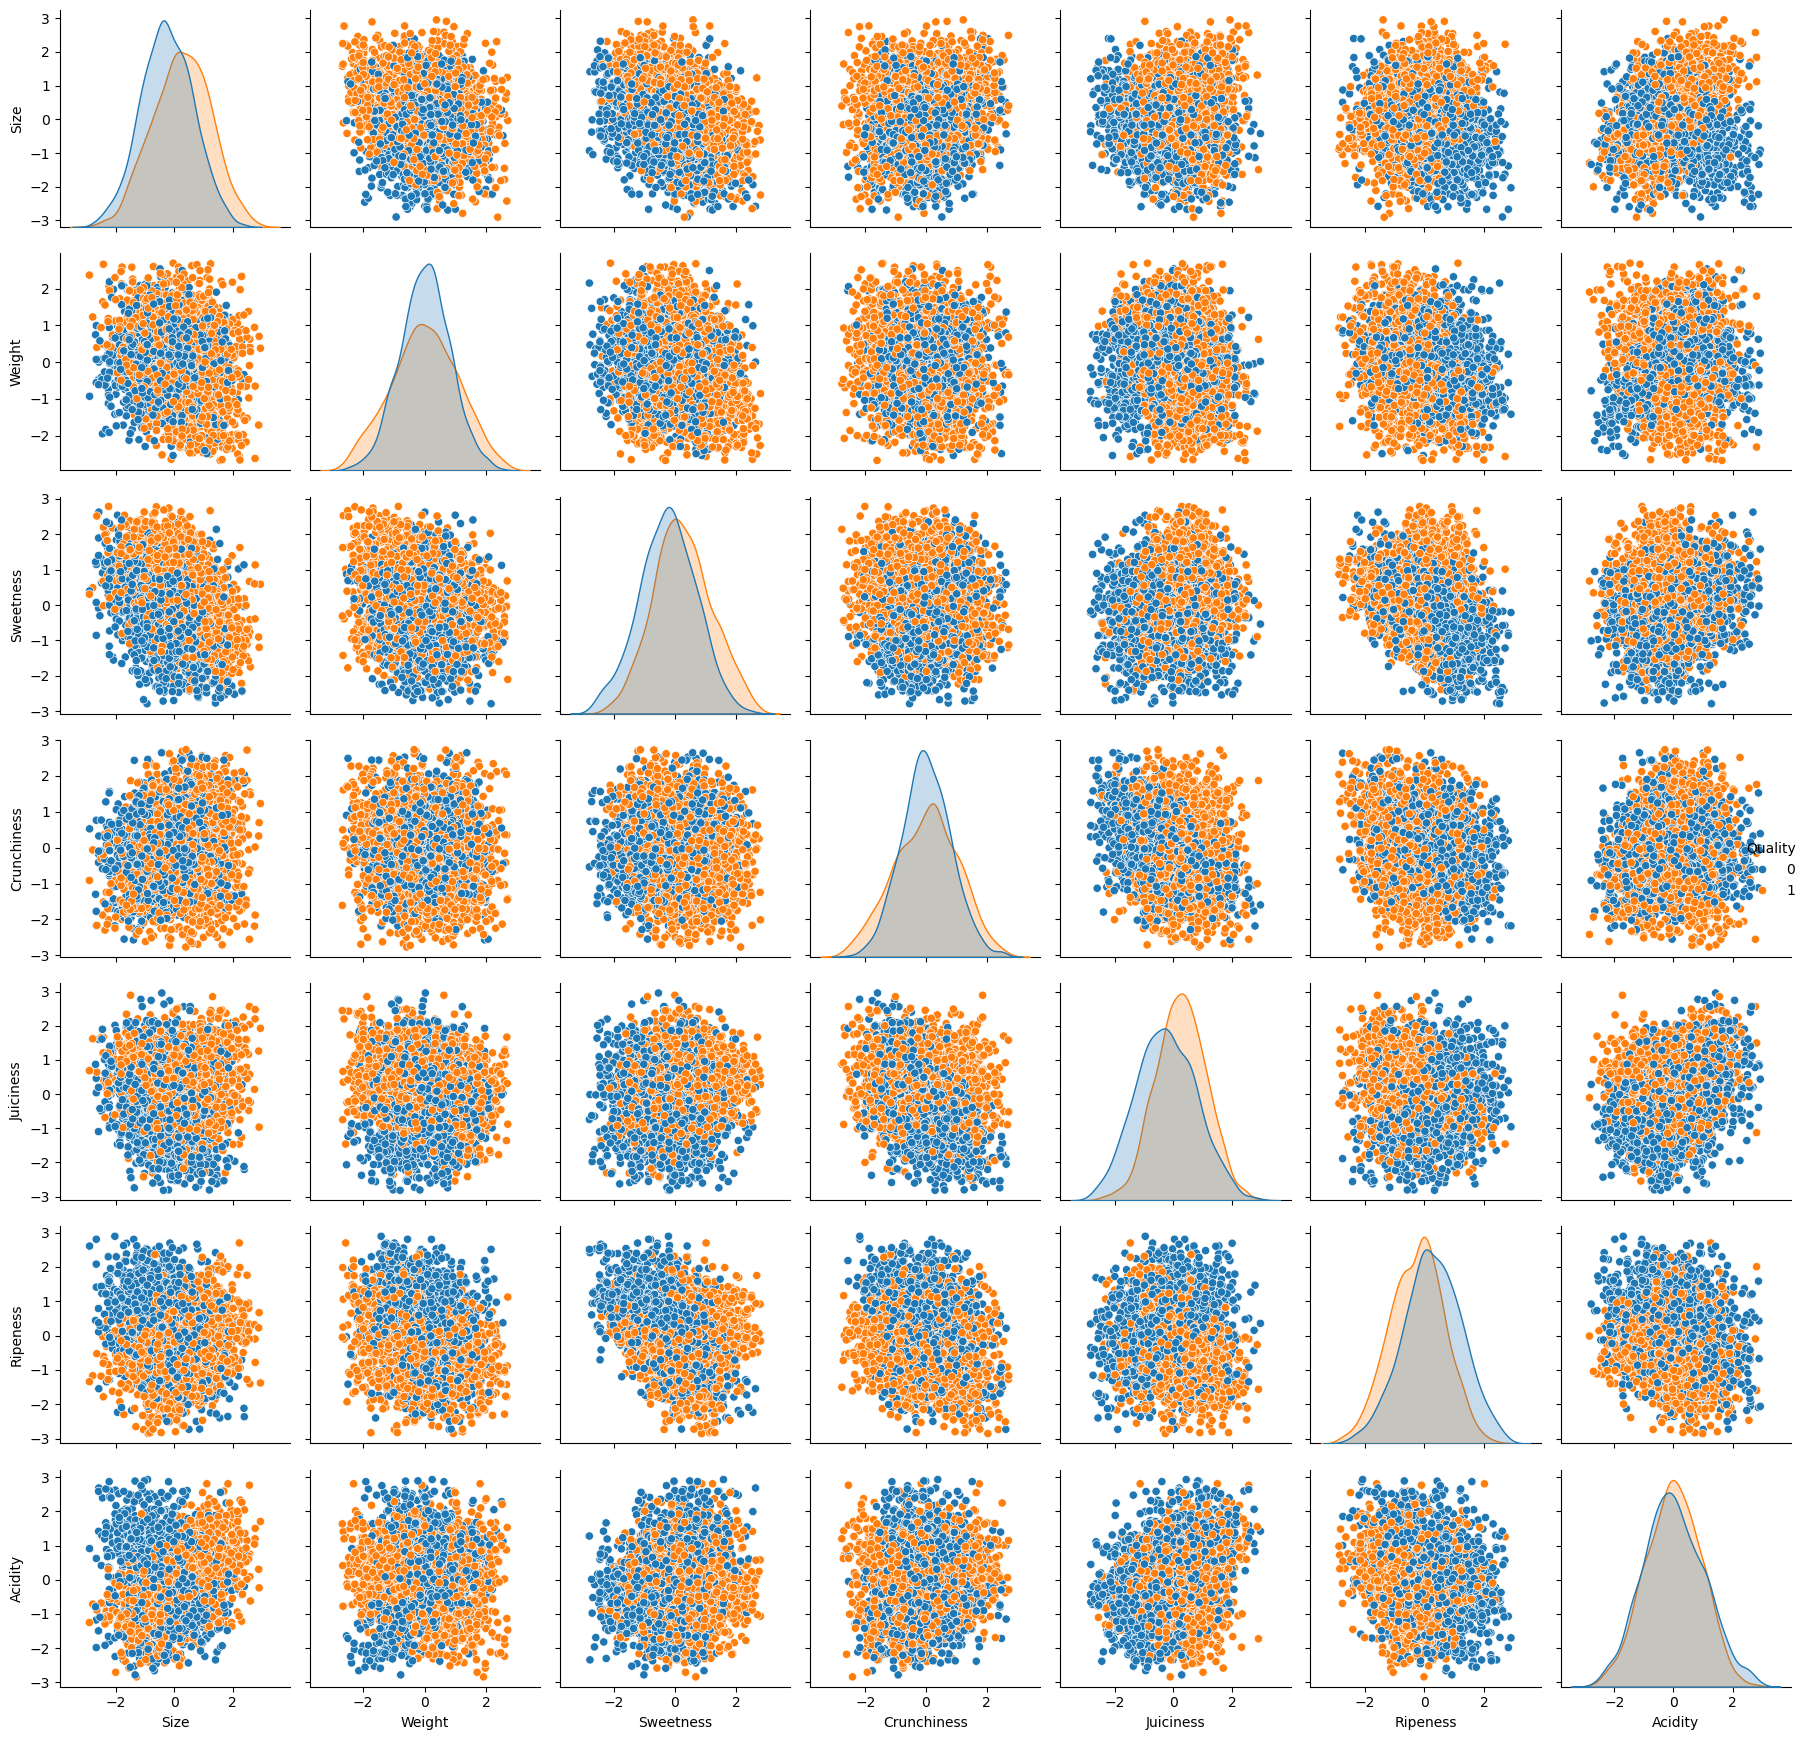

In [8]:
# histograma + dispersão
plt.figure(figsize=(15,6))
sns.pairplot(df, hue="Quality")
plt.tight_layout()
plt.show()

In [9]:
# Separando conjunto de treino e teste
X = df.drop(columns="Quality").values 
Y = df["Quality"].values

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)


print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(3097, 7)
(3097,)
(775, 7)
(775,)


In [10]:
# Algoritmos
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))

In [11]:
# Validação cruzada para avaliar o melhor
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
   results.append(cv_results)
   names.append(name)
   msg = f"{name}: Acurácia média: {cv_results.mean()*100} {cv_results.std()}"
   print(msg)

LR: Acurácia média: 74.36319031214114 0.016452141659964902
LDA: Acurácia média: 74.20200438459129 0.01879690405367987
KNN: Acurácia média: 89.4423217454849 0.016155370869577277
CART: Acurácia média: 81.8525942165153 0.024520637732618374
NB: Acurácia média: 74.13738386052825 0.017551646773802138
SVM: Acurácia média: 88.92535755298049 0.014255055790687093


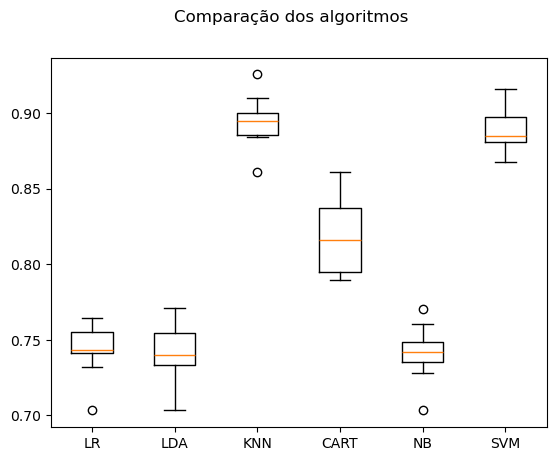

In [12]:
# Comparação dos Algoritmos
fig = plt.figure()
fig.suptitle("Comparação dos algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

74.20083952211817


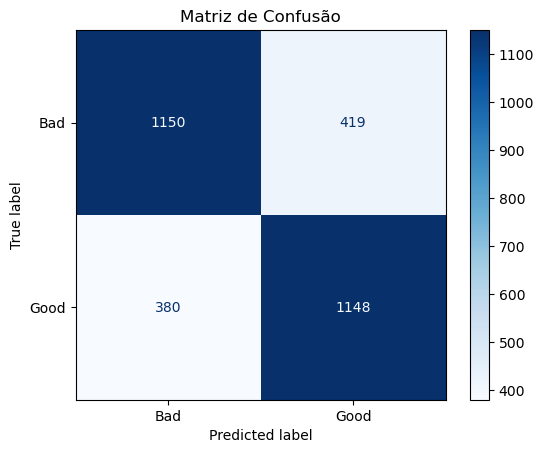

              precision    recall  f1-score   support

         Bad       0.75      0.73      0.74      1569
        Good       0.73      0.75      0.74      1528

    accuracy                           0.74      3097
   macro avg       0.74      0.74      0.74      3097
weighted avg       0.74      0.74      0.74      3097



In [13]:
# Treinando e validação de todos os algoritmos
# Logistic Regression no conjunto de treinamento
LR = LogisticRegression(solver="liblinear", multi_class="ovr")
LR.fit(X_train, Y_train)
predictions_LR = LR.predict(X_train)
print(accuracy_score(Y_train, predictions_LR) * 100)

confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    Y_train, 
    predictions_LR,
    display_labels=["Bad", "Good"], 
    cmap="Blues" 
)
confusion_matrix.ax_.set_title("Matriz de Confusão")
plt.show()

print(classification_report(Y_train, predictions_LR,target_names=["Bad","Good"]))

75.61290322580645


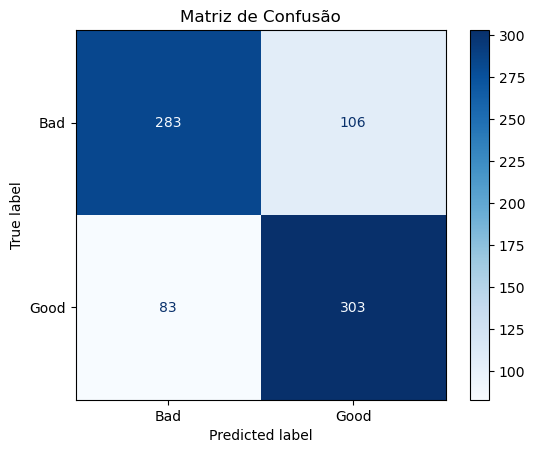

              precision    recall  f1-score   support

         Bad       0.77      0.73      0.75       389
        Good       0.74      0.78      0.76       386

    accuracy                           0.76       775
   macro avg       0.76      0.76      0.76       775
weighted avg       0.76      0.76      0.76       775



In [14]:
# Logistic Regression no conjunto de teste
LR = LogisticRegression(solver="liblinear", multi_class="ovr")
LR.fit(X_train, Y_train)
predictions_LR = LR.predict(X_test)
print(accuracy_score(Y_test, predictions_LR) * 100)

confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    Y_test, 
    predictions_LR,
    display_labels=["Bad", "Good"], 
    cmap="Blues" 
)
confusion_matrix.ax_.set_title("Matriz de Confusão")
plt.show()

print(classification_report(Y_test, predictions_LR,target_names=["Bad","Good"]))

74.42686470778173


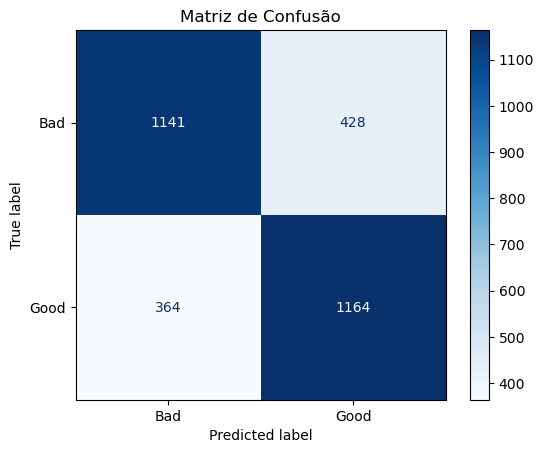

              precision    recall  f1-score   support

         Bad       0.76      0.73      0.74      1569
        Good       0.73      0.76      0.75      1528

    accuracy                           0.74      3097
   macro avg       0.74      0.74      0.74      3097
weighted avg       0.74      0.74      0.74      3097



In [15]:
# Linear Discriminant Analysis no conjunto de treinamento
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions_LDA = LDA.predict(X_train)
print(accuracy_score(Y_train, predictions_LDA) * 100)

confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    Y_train, 
    predictions_LDA,
    display_labels=["Bad", "Good"], 
    cmap="Blues" 
)
confusion_matrix.ax_.set_title("Matriz de Confusão")
plt.show()

print(classification_report(Y_train, predictions_LDA,target_names=["Bad","Good"]))

75.87096774193547


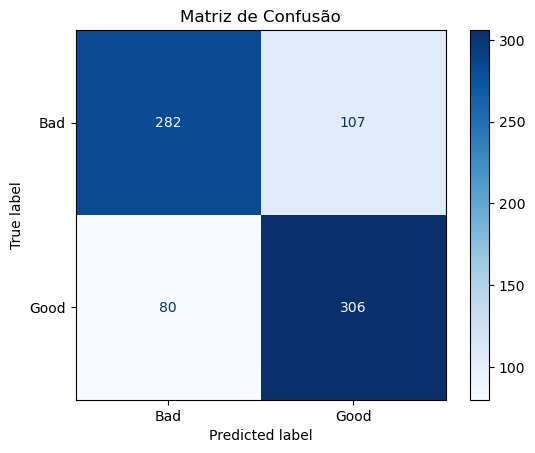

              precision    recall  f1-score   support

         Bad       0.78      0.72      0.75       389
        Good       0.74      0.79      0.77       386

    accuracy                           0.76       775
   macro avg       0.76      0.76      0.76       775
weighted avg       0.76      0.76      0.76       775



In [16]:
# Linear Discriminant Analysis no conjunto de teste
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions_LDA = LDA.predict(X_test)
print(accuracy_score(Y_test, predictions_LDA) * 100)

confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    Y_test, 
    predictions_LDA,
    display_labels=["Bad", "Good"], 
    cmap="Blues" 
)
confusion_matrix.ax_.set_title("Matriz de Confusão")
plt.show()

print(classification_report(Y_test, predictions_LDA,target_names=["Bad","Good"]))

93.21924443009364


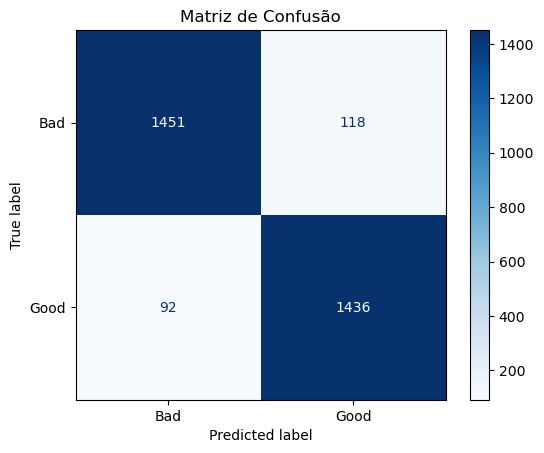

              precision    recall  f1-score   support

         Bad       0.94      0.92      0.93      1569
        Good       0.92      0.94      0.93      1528

    accuracy                           0.93      3097
   macro avg       0.93      0.93      0.93      3097
weighted avg       0.93      0.93      0.93      3097



In [17]:
# KNeighbors Classifier no conjunto de treinamento
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions_KNN = KNN.predict(X_train)
print(accuracy_score(Y_train, predictions_KNN) * 100)

confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    Y_train, 
    predictions_KNN,
    display_labels=["Bad", "Good"], 
    cmap="Blues" 
)
confusion_matrix.ax_.set_title("Matriz de Confusão")
plt.show()

print(classification_report(Y_train, predictions_KNN,target_names=["Bad","Good"]))

89.29032258064517


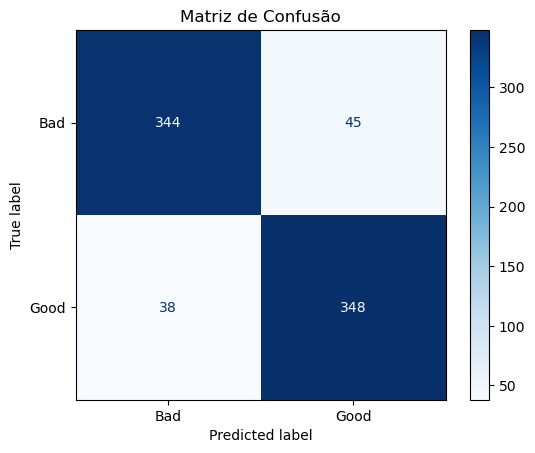

              precision    recall  f1-score   support

         Bad       0.90      0.88      0.89       389
        Good       0.89      0.90      0.89       386

    accuracy                           0.89       775
   macro avg       0.89      0.89      0.89       775
weighted avg       0.89      0.89      0.89       775



In [18]:
# KNeighbors Classifier no conjunto de teste
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions_KNN = KNN.predict(X_test)
print(accuracy_score(Y_test, predictions_KNN) * 100)

confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    Y_test, 
    predictions_KNN,
    display_labels=["Bad", "Good"], 
    cmap="Blues" 
)
confusion_matrix.ax_.set_title("Matriz de Confusão")
plt.show()

print(classification_report(Y_test, predictions_KNN,target_names=["Bad","Good"]))